# K Nearest Neighbors

The first method we'll look at is called K Nearest Neighbors. It sounds similar to K means, but don't confuse them just because their name sounds the same.

The principle behind nearest neighbor methods is to find a predefined number of training samples, *k*, closest in distance to the new point, and predict the label from these. The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice. Neighbors-based methods are known as non-generalizing machine learning methods, since they simply “remember” all of its training data.

<img src="figures/knn1.png" width="40%">

Source: [https://www.datasciencecentral.com/]

## Classification

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

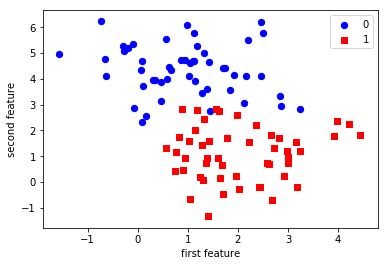

In [2]:
X, y = make_blobs(centers=2, random_state=0)

plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', s=40, label='1', marker='s')

plt.xlabel('first feature')
plt.ylabel('second feature')
plt.legend(loc='upper right');

In [3]:
from sklearn.neighbors import KNeighborsClassifier

This time we set a parameter of the KNeighborsClassifier to tell it we only want to look at one nearest neighbor:

In [4]:
knn = KNeighborsClassifier(n_neighbors=1)

We fit the model with out training data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=y)

knn.fit(X_train, y_train);

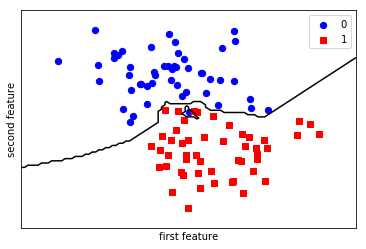

In [6]:
from figures import plot_2d_separator
plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            c='blue', s=40, label='0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            c='red', s=40, label='1', marker='s')

plt.xlabel("first feature")
plt.ylabel("second feature")
plot_2d_separator(knn, X)
plt.legend(loc='upper right');

In [7]:
knn.score(X_test, y_test)

1.0

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Download ``02_iris_knn.py`` from the course website. Play with different values of the ``n_neighbors`` and observe how training and test classification change. Also change the ``weights`` argument from ``uniform`` to ``distance`` and note the classification change.
      </li>
    </ul>
</div>

In [8]:
# %load exercises/02_iris_knn.py

## Regression

K nearest neighbors can be easily used in regression as well. This time, instead of voting on a class label based on nearest neighbors, the output value will be the average of the outputs of the *k* nearest neighbors. Here is an example using Airbnb data:

<img src="figures/knn_infographic.png" width="80%">

Source: [https://www.dataquest.io]

Let's generate some data based on a ``sin`` curve and see how well K nearest neighbors does.

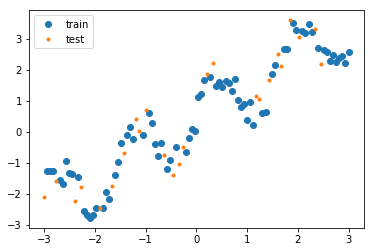

In [9]:
x = np.linspace(-3, 3, 100)
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))
X = x[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
plt.plot(X_train, y_train, 'o', label='train');
plt.plot(X_test, y_test, '.', label='test');
plt.legend(loc='best');

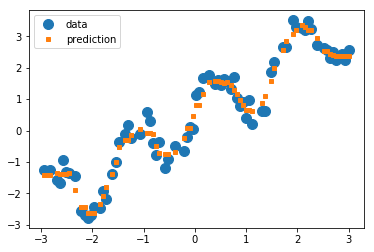

In [10]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)

plt.plot(X_train, y_train, 'o', label="data", markersize=10)
plt.plot(X_train, y_pred_train, 's', label="prediction", markersize=4)
plt.legend(loc='best');

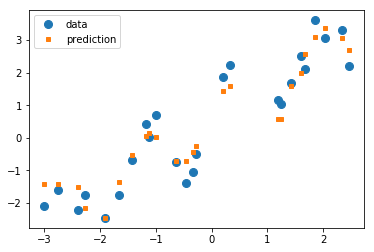

In [11]:
y_pred_test = knn.predict(X_test)

plt.plot(X_test, y_test, 'o', label="data", markersize=8)
plt.plot(X_test, y_pred_test, 's', label="prediction", markersize=4)
plt.legend(loc='best');

In [12]:
knn.score(X_test, y_test)

0.9416284042675592

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>
      Download ``02_diabetes_knn.py`` from the course website. Play with different values of the ``n_neighbors`` and observe how training and test accuracy change. Also change the ``weights`` argument from ``uniform`` to ``distance`` and note the accuracy change.
      </li>
    </ul>
</div>

In [13]:
# %load exercises/02_diabetes_knn.py